In [2]:
import numpy as np
import pandas as pd

In [3]:
def generic_cost(X,Y,m,c):
    M = len(X)
    total_cost = 0
    for i in range(M):
        x = X[i,:]
        y = Y[i]
        total_cost += (1/M) * ((y - (m * x).sum() - c)**2)
    return total_cost

In [4]:
def score(Y_true,Y_pred):
    u = ((Y_true - Y_pred)**2).sum()
    v = ((Y_true - Y_true.mean())**2).sum()
    return 1 - u/v

In [172]:
def generic_step_gradient_descent(X,Y,learning_rate,m,c):
    N = X.shape[1]
    M = len(X)
    for i in range(M):
        x = X[i,:]
        y = Y[i]
        m = m - learning_rate * (-2/M) * (y - (m*x).sum() - c)*x
        c = c - learning_rate * (-2/M) * (y - (m*x).sum() - c)
    return m,c

In [150]:
# Generic Gradient Descent
def generic_gradient_descent(X,Y,learning_rate,num_iterations):
    N = X.shape[1]
    m, c = np.zeros(N) , 0
    for i in range(num_iterations):
        m, c = generic_step_gradient_descent(X,Y,learning_rate,m,c)
        if(i>0):
            print(i,"Cost: ", generic_cost(X,Y,m,c))
    return m,c

In [361]:
# adding all the 2d features columns and checking the score
import math
def add_feature(dataset):
    df = pd.DataFrame(dataset)
    df1 = df.copy()
    c = dataset.shape[1]
    df1[c] = df[0]*df[0]*df[0]*df[0]
    c+=1
    df1[c] = 1/(df[1]*df[1]*df[1]*df[1])
    c+=1
    df1[c] = 1/(df[2]*df[2]*df[2]*df[2]*df[2]*df[2])
    c+=1
    df1[c] = 1/(df[3]*df[3]*df[3])
    c+=1
    df1[c] = 1/(df[0]*df[1])
    c+=1
    df1[c] = 1/(df[1]*df[2])
    c+=1
    df1[c] = 1/(df[2]*df[3])
    c+=1
    df1[c] = 1/(df[1]*df[3])
    c+=1
#     df1[c] = (1/(df[1]*df[0]))*df[3]
#     c+=1
#     df1[c] = 1/(df[1]*df[1])
#     c+=1
#     df1[c] = df[3]*df[3]
#     for i in range(dataset.shape[1]):
#         df1[c] = 1/(df[i]*df[i])
#         c+=1
#         df1[c] = 1/(df[i]*df[i]*df[i])
#         c+=1
#         df1[c] = df[i]*df[i]*df[i]
#         c+=1
#         df1[c] = 1/np.exp(df[i])
#         c+=1
    X2 = df1.values
    return X2

In [395]:
def run_generic():
    # getting the training data
    dataset = np.genfromtxt("0000000000002419_training_ccpp_x_y_train.csv",delimiter = ",")
    X_train = np.array(dataset[:,:-1])
    X_train = add_feature(X_train)
    Y_train = np.array(dataset[:,-1])
    
    # applying feature scaling
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    print("Shape",X_train.shape)
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    
    # getting the test data
    X_test = np.genfromtxt("0000000000002419_test_ccpp_x_test.csv",delimiter = ",")
    X_test = add_feature(X_test)
    X_test = scaler.transform(X_test)
    
    # defining parameters and calling calling gradient descent function
    learning_rate = 3.099
    num_iterations = 1000
    m, c = generic_gradient_descent(X_train,Y_train,learning_rate,num_iterations)
    
    Y_train_pred = (m * X_train).sum(axis=1) + c
    Y_test_pred = (m * X_test).sum(axis=1) + c
    print("Score is: ",score(Y_train,Y_train_pred))
    np.savetxt("Y_pred1.csv",Y_test_pred,delimiter = ",",fmt='%f')

In [396]:
run_generic()

Shape (7176, 12)
1 Cost:  21.58471999504615
2 Cost:  20.765113005589363
3 Cost:  20.172971856374858
4 Cost:  19.736299558916127
5 Cost:  19.413684971473195
6 Cost:  19.175099957532396
7 Cost:  18.9984568949198
8 Cost:  18.86748985191136
9 Cost:  18.770217449092932
10 Cost:  18.697812438452473
11 Cost:  18.643769733420527
12 Cost:  18.603294124333868
13 Cost:  18.57284965663222
14 Cost:  18.54982795502125
15 Cost:  18.5323040650304
16 Cost:  18.51885669271378
17 Cost:  18.508435835447624
18 Cost:  18.500265292122243
19 Cost:  18.49377084733645
20 Cost:  18.488527356171467
21 Cost:  18.484219745129852
22 Cost:  18.480614260951775
23 Cost:  18.47753726735221
24 Cost:  18.47485960220492
25 Cost:  18.472485031980913
26 Cost:  18.470341726075766
27 Cost:  18.468375957614168
28 Cost:  18.466547446336826
29 Cost:  18.46482591302595
30 Cost:  18.4631885282066
31 Cost:  18.46161802127004
32 Cost:  18.46010127759628
33 Cost:  18.458628296496766
34 Cost:  18.457191416138723
35 Cost:  18.4557847361

281 Cost:  18.27570967109825
282 Cost:  18.27533365716515
283 Cost:  18.27495943473217
284 Cost:  18.274586995114124
285 Cost:  18.2742163296698
286 Cost:  18.27384742980065
287 Cost:  18.273480286951553
288 Cost:  18.273114892610046
289 Cost:  18.272751238306526
290 Cost:  18.272389315613538
291 Cost:  18.27202911614593
292 Cost:  18.271670631559985
293 Cost:  18.271313853554215
294 Cost:  18.27095877386846
295 Cost:  18.270605384283343
296 Cost:  18.270253676620875
297 Cost:  18.269903642743724
298 Cost:  18.26955527455507
299 Cost:  18.269208563998372
300 Cost:  18.268863503057226
301 Cost:  18.268520083755124
302 Cost:  18.268178298155156
303 Cost:  18.267838138359828
304 Cost:  18.26749959651099
305 Cost:  18.2671626647895
306 Cost:  18.266827335414785
307 Cost:  18.266493600645216
308 Cost:  18.266161452777293
309 Cost:  18.2658308841459
310 Cost:  18.26550188712376
311 Cost:  18.26517445412135
312 Cost:  18.26484857758691
313 Cost:  18.26452425000601
314 Cost:  18.26420146390123

558 Cost:  18.217633608901817
559 Cost:  18.21753213215452
560 Cost:  18.217431129201003
561 Cost:  18.21733059778991
562 Cost:  18.217230535680155
563 Cost:  18.21713094064218
564 Cost:  18.21703181045633
565 Cost:  18.216933142914304
566 Cost:  18.216834935818067
567 Cost:  18.216737186979945
568 Cost:  18.21663989422317
569 Cost:  18.21654305538126
570 Cost:  18.21644666829813
571 Cost:  18.21635073082787
572 Cost:  18.216255240835345
573 Cost:  18.21616019619504
574 Cost:  18.21606559479206
575 Cost:  18.215971434521535
576 Cost:  18.215877713288823
577 Cost:  18.215784429009133
578 Cost:  18.215691579607878
579 Cost:  18.215599163020176
580 Cost:  18.21550717719145
581 Cost:  18.215415620076346
582 Cost:  18.21532448963993
583 Cost:  18.21523378385701
584 Cost:  18.21514350071149
585 Cost:  18.21505363819766
586 Cost:  18.214964194319073
587 Cost:  18.21487516708891
588 Cost:  18.214786554529805
589 Cost:  18.214698354674045
590 Cost:  18.214610565563333
591 Cost:  18.214523185248

836 Cost:  18.20175425669352
837 Cost:  18.201726127046946
838 Cost:  18.201698124751683
839 Cost:  18.2016702492131
840 Cost:  18.20164249983882
841 Cost:  18.201614876039777
842 Cost:  18.201587377229608
843 Cost:  18.20156000282477
844 Cost:  18.20153275224455
845 Cost:  18.201505624910503
846 Cost:  18.201478620247556
847 Cost:  18.20145173768307
848 Cost:  18.20142497664718
849 Cost:  18.201398336572847
850 Cost:  18.20137181689526
851 Cost:  18.20134541705298
852 Cost:  18.201319136486667
853 Cost:  18.201292974639856
854 Cost:  18.201266930958752
855 Cost:  18.201241004892243
856 Cost:  18.20121519589151
857 Cost:  18.201189503410866
858 Cost:  18.20116392690672
859 Cost:  18.201138465838344
860 Cost:  18.20111311966751
861 Cost:  18.201087887858467
862 Cost:  18.201062769878043
863 Cost:  18.20103776519565
864 Cost:  18.201012873283066
865 Cost:  18.200988093615152
866 Cost:  18.200963425668355
867 Cost:  18.200938868922204
868 Cost:  18.200914422858474
869 Cost:  18.2008900869

Shape (7176, 4)


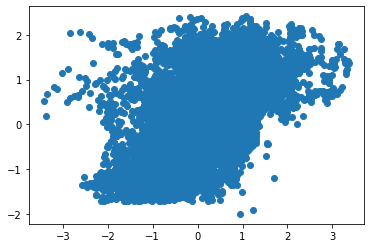

In [241]:
import matplotlib.pyplot as plt
dataset = np.genfromtxt("0000000000002419_training_ccpp_x_y_train.csv",delimiter = ",")
X_train = np.array(dataset[:,:-1])
Y_train = np.array(dataset[:,-1])

# applying feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print("Shape",X_train.shape)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(Y_train.reshape(-1,1))
Y_train = scaler.transform(Y_train.reshape(-1,1))

plt.scatter(X_train[:,2],Y_train)
plt.show()